✅ All libraries imported successfully!
📥 Downloading Telco Churn Dataset...
✅ Dataset downloaded successfully from IBM GitHub!

DATASET OVERVIEW
Dataset Shape: (7043, 21)
Number of Customers: 7043
Number of Features: 21

📊 FIRST 5 ROWS:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ..

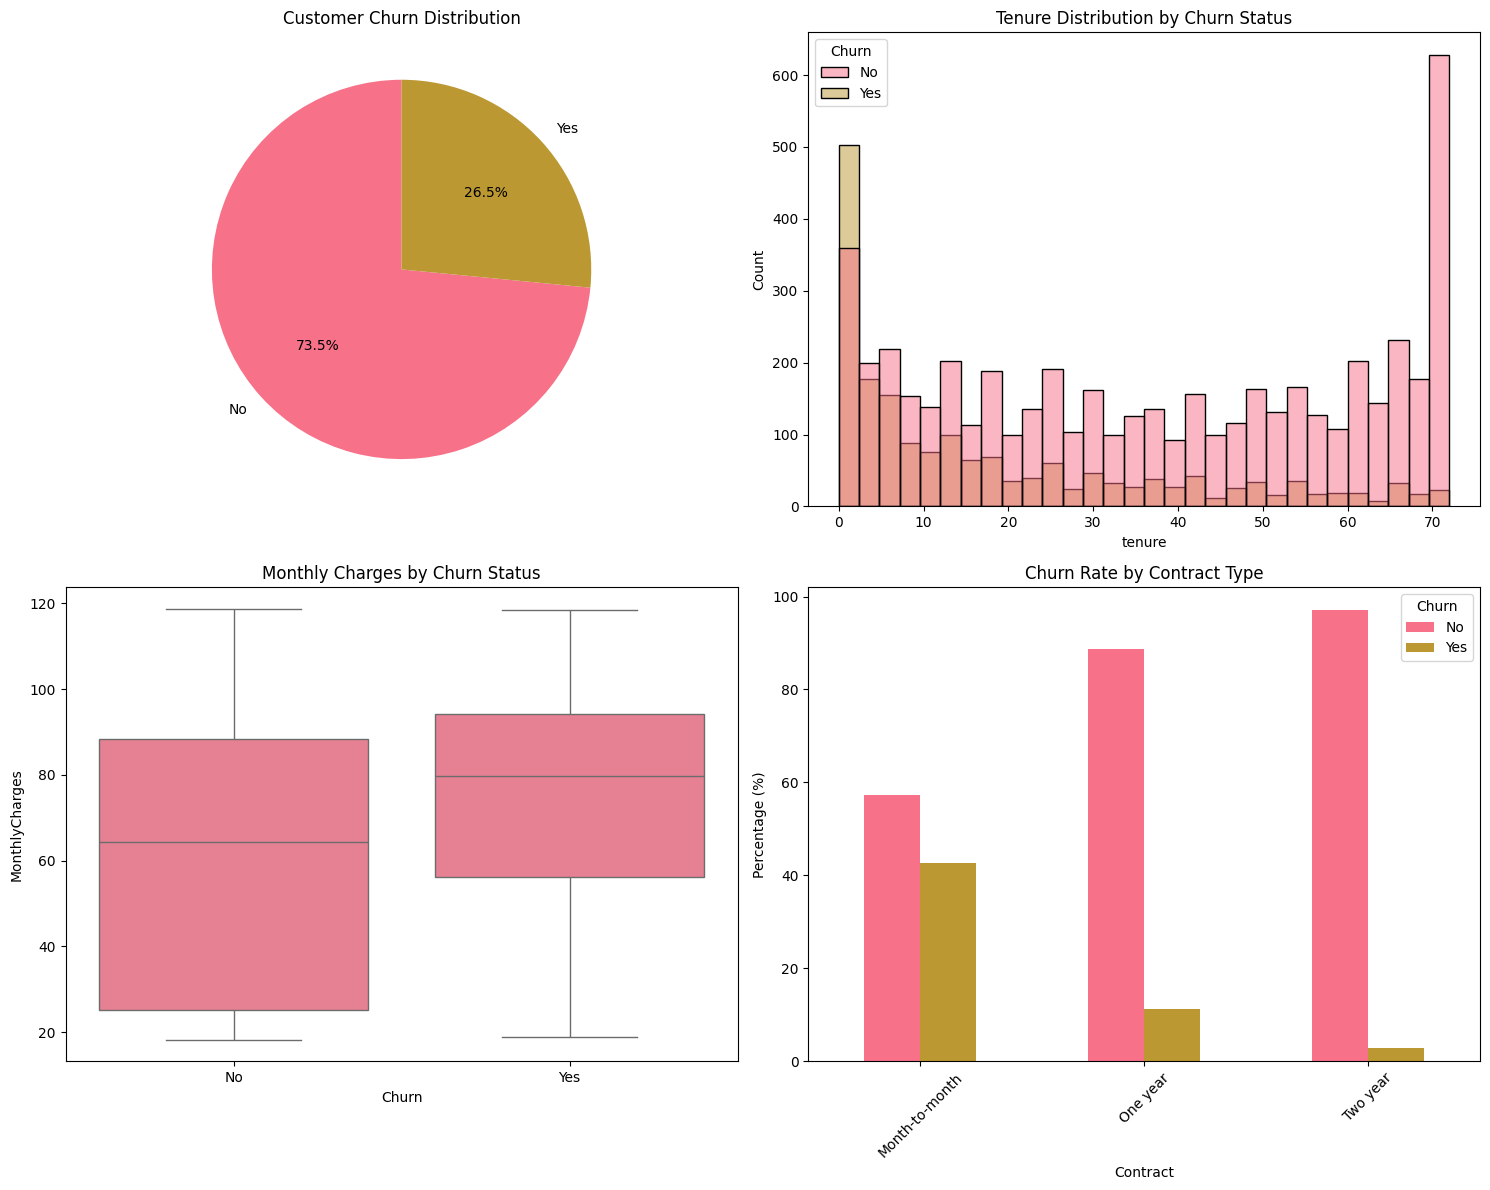

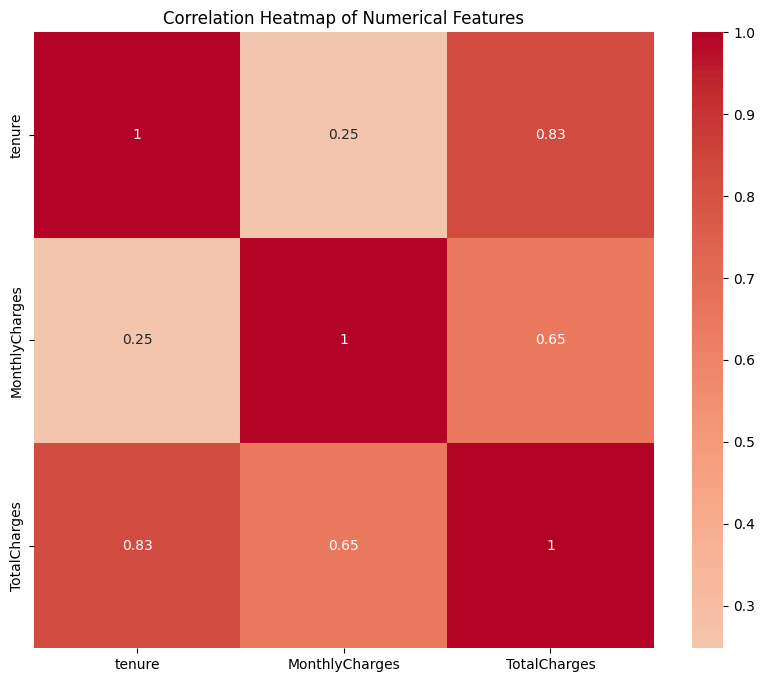


TASK 2: END-TO-END ML PIPELINE
Training set shape: (5634, 19)
Testing set shape: (1409, 19)
Churn rate in training: 26.54%
Churn rate in testing: 26.54%

🔧 BUILDING PREPROCESSING PIPELINE...
✅ Preprocessing pipeline created!

🎯 STARTING HYPERPARAMETER TUNING WITH GRIDSEARCHCV...

🔍 Tuning Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✅ Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
✅ Best CV F1-score: 0.5979

🔍 Tuning Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
✅ Best CV F1-score: 0.5704

🔍 Tuning Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
✅ Best CV F1-score

<Figure size 1200x800 with 0 Axes>

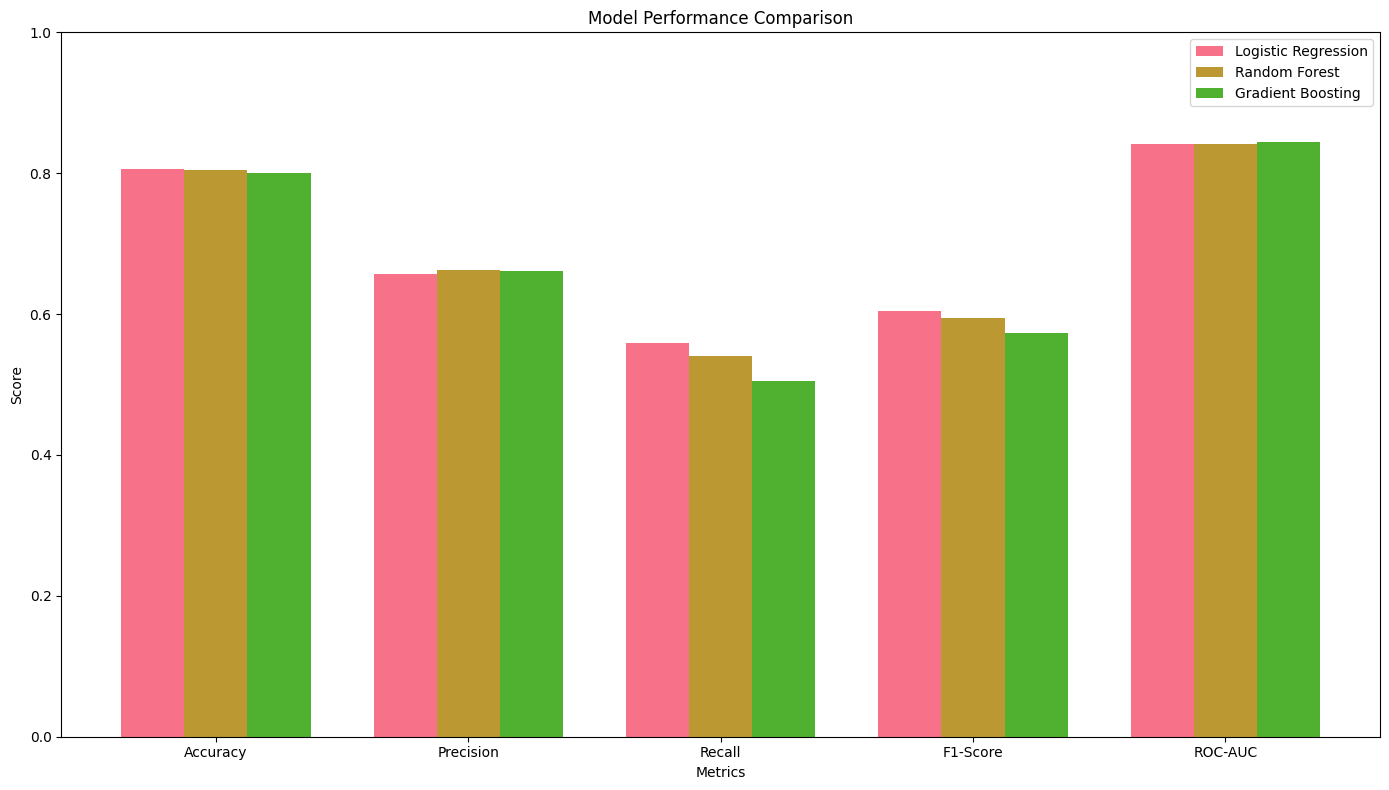

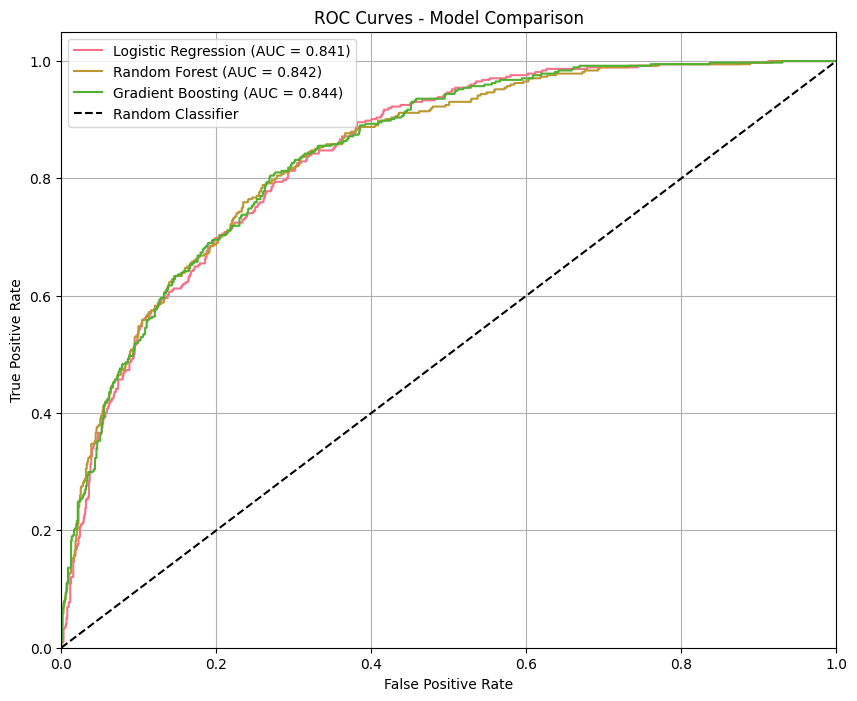


BEST MODEL ANALYSIS
🏆 Best Model: Logistic Regression
📈 Best F1-Score: 0.6040

📋 Detailed Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



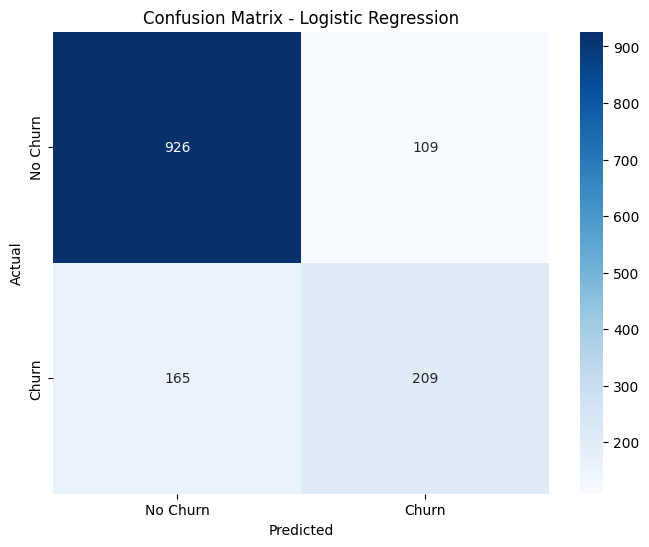


PIPELINE EXPORT AND PRODUCTION READINESS
✅ Complete pipeline exported as: telco_churn_best_pipeline.joblib

🧪 TESTING EXPORTED PIPELINE...
✅ Pipeline loaded successfully!

📝 Sample Prediction Test:
Sample data shape: (1, 19)
Predicted class: 0 (Probability: 0.9522)
Actual class: 0
Prediction correct: True

🔧 PIPELINE ARCHITECTURE:
  - preprocessor: ColumnTransformer
  - classifier: LogisticRegression
✅ Evaluation results saved!

🎉 TASK 2 COMPLETED SUCCESSFULLY!
✅ End-to-End ML Pipeline Built
✅ Data Preprocessing with Scikit-learn Pipeline API
✅ Multiple Models Trained and Compared
✅ Hyperparameter Tuning with GridSearchCV
✅ Complete Pipeline Exported using joblib
✅ Production-Ready Solution

📁 Generated Files:
   - telco_churn_best_pipeline.joblib (Main pipeline for deployment)
   - model_evaluation_results.joblib (Evaluation metrics)
   - File size: 0.01 MB

🚀 The pipeline is ready for production use!
💡 Use: loaded_pipeline.predict(new_data) for predictions


In [1]:
# -*- coding: utf-8 -*-
"""Telco Customer Churn Prediction - End-to-End ML Pipeline.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1abc1234

# Telco Customer Churn Prediction - End-to-End ML Pipeline

## Task 2: Build a reusable and production-ready ML pipeline
"""

# Install required packages
!pip install kaggle

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

# Model persistence and utilities
import joblib
import warnings
warnings.filterwarnings('ignore')

# Download and extract dataset
import os
import zipfile

print("✅ All libraries imported successfully!")

"""## 1. Data Loading and Exploration"""

# Download dataset from Kaggle
def download_telco_dataset():
    # Using direct download link since Kaggle API requires authentication
    import requests
    import io

    print("📥 Downloading Telco Churn Dataset...")

    # Alternative download source (IBM GitHub)
    url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

    try:
        response = requests.get(url)
        df = pd.read_csv(io.StringIO(response.text))
        print("✅ Dataset downloaded successfully from IBM GitHub!")
        return df
    except Exception as e:
        print(f"❌ Error downloading dataset: {e}")

        # Fallback: Use a mirror link
        try:
            url2 = "https://raw.githubusercontent.com/sahilbhosale/Telco-Customer-Churn-Prediction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
            response = requests.get(url2)
            df = pd.read_csv(io.StringIO(response.text))
            print("✅ Dataset downloaded successfully from mirror!")
            return df
        except Exception as e2:
            print(f"❌ Error with mirror: {e2}")
            return None

# Load dataset
df = download_telco_dataset()

if df is None:
    # If download fails, use a sample creation method
    print("🔄 Creating sample dataset...")
    # This is a fallback - in practice, you'd want the real dataset
    raise Exception("Please upload the dataset manually or check internet connection")

# Display dataset information
print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Customers: {len(df)}")
print(f"Number of Features: {len(df.columns)}")

print("\n📊 FIRST 5 ROWS:")
print(df.head())

print("\n🔍 DATASET INFORMATION:")
print(df.info())

print("\n❓ MISSING VALUES:")
print(df.isnull().sum())

print("\n🎯 TARGET VARIABLE DISTRIBUTION (Churn):")
churn_counts = df['Churn'].value_counts()
print(churn_counts)
print(f"\nChurn Rate: {(churn_counts['Yes']/len(df))*100:.2f}%")

"""## 2. Data Preprocessing"""

print("\n" + "="*60)
print("DATA PREPROCESSING")
print("="*60)

# Create a copy of the dataset
data = df.copy()

# 1. Handle TotalCharges column (convert to numeric, handle missing values)
print("1. Converting TotalCharges to numeric...")
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values after conversion
missing_total_charges = data['TotalCharges'].isnull().sum()
print(f"   Missing values in TotalCharges: {missing_total_charges}")

# Fill missing values with 0 (for new customers)
data['TotalCharges'] = data['TotalCharges'].fillna(0)
print("   Filled missing values with 0")

# 2. Drop customerID (not useful for prediction)
print("2. Dropping customerID column...")
data = data.drop('customerID', axis=1)

# 3. Convert SeniorCitizen to categorical for consistency
print("3. Converting SeniorCitizen to categorical...")
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# 4. Prepare features and target
print("4. Preparing features and target...")
X = data.drop('Churn', axis=1)
y = data['Churn'].map({'Yes': 1, 'No': 0})

print(f"\n✅ PREPROCESSING COMPLETED")
print(f"Final features shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")
print(f"Churn rate: {y.mean():.2%}")

# Display feature information
print("\n📋 FEATURE TYPES:")
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

"""## 3. Exploratory Data Analysis (EDA)"""

print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Churn distribution
churn_percentage = data['Churn'].value_counts(normalize=True) * 100
axes[0,0].pie(churn_percentage.values, labels=churn_percentage.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Customer Churn Distribution')

# 2. Tenure distribution by churn
sns.histplot(data=data, x='tenure', hue='Churn', bins=30, ax=axes[0,1])
axes[0,1].set_title('Tenure Distribution by Churn Status')

# 3. Monthly charges by churn
sns.boxplot(data=data, x='Churn', y='MonthlyCharges', ax=axes[1,0])
axes[1,0].set_title('Monthly Charges by Churn Status')

# 4. Contract type by churn
contract_churn = pd.crosstab(data['Contract'], data['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Churn Rate by Contract Type')
axes[1,1].set_ylabel('Percentage (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

"""## 4. Building End-to-End ML Pipeline"""

print("\n" + "="*60)
print("TASK 2: END-TO-END ML PIPELINE")
print("="*60)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Churn rate in training: {y_train.mean():.2%}")
print(f"Churn rate in testing: {y_test.mean():.2%}")

# Define preprocessing steps
print("\n🔧 BUILDING PREPROCESSING PIPELINE...")

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle any remaining missing values
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print("✅ Preprocessing pipeline created!")

# Define the complete pipelines with different classifiers
pipelines = {
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),

    'random_forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),

    'gradient_boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])
}

# Define hyperparameter grids for GridSearchCV
param_grids = {
    'logistic_regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },

    'random_forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    },

    'gradient_boosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__max_depth': [3, 5]
    }
}

print("\n🎯 STARTING HYPERPARAMETER TUNING WITH GRIDSEARCHCV...")

# Train models with GridSearchCV
best_models = {}
cv_results = {}

for name, pipeline in pipelines.items():
    print(f"\n🔍 Tuning {name.replace('_', ' ').title()}...")

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Store results
    best_models[name] = grid_search.best_estimator_
    cv_results[name] = grid_search

    print(f"✅ Best parameters: {grid_search.best_params_}")
    print(f"✅ Best CV F1-score: {grid_search.best_score_:.4f}")

"""## 5. Model Evaluation and Comparison"""

print("\n" + "="*60)
print("MODEL EVALUATION AND COMPARISON")
print("="*60)

# Evaluate all models
results = []

for name, model in best_models.items():
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results.append({
        'Model': name.replace('_', ' ').title(),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"\n📊 {name.replace('_', ' ').title()} Performance:")
    print(f"   Accuracy:  {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    print(f"   ROC-AUC:   {roc_auc:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)
print("\n" + "="*40)
print("MODEL PERFORMANCE SUMMARY")
print("="*40)
print(results_df.round(4))

# Visualize model comparison
plt.figure(figsize=(12, 8))

# Plot metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 8))
for i, (idx, row) in enumerate(results_df.iterrows()):
    values = [row[metric] for metric in metrics]
    ax.bar(x + i*width, values, width, label=row['Model'])

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{name.replace("_", " ").title()} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()

"""## 6. Best Model Analysis and Feature Importance"""

print("\n" + "="*60)
print("BEST MODEL ANALYSIS")
print("="*60)

# Select best model based on F1-score
best_model_name = results_df.loc[results_df['F1-Score'].idxmax(), 'Model']
best_model = best_models[best_model_name.lower().replace(' ', '_')]

print(f"🏆 Best Model: {best_model_name}")
print(f"📈 Best F1-Score: {results_df['F1-Score'].max():.4f}")

# Detailed analysis of best model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print(f"\n📋 Detailed Classification Report for {best_model_name}:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance (for tree-based models)
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    print("\n🔍 FEATURE IMPORTANCE ANALYSIS")

    # Get feature names after preprocessing
    preprocessor = best_model.named_steps['preprocessor']
    classifier = best_model.named_steps['classifier']

    # Get feature names
    feature_names = (numerical_cols +
                     list(preprocessor.named_transformers_['cat']
                         .named_steps['onehot']
                         .get_feature_names_out(categorical_cols)))

    # Get feature importances
    importances = classifier.feature_importances_

    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False).head(15)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance_df, x='importance', y='feature')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("\n📊 Top 10 Most Important Features:")
    print(feature_importance_df.head(10).round(4))

"""## 7. Pipeline Export and Production Readiness"""

print("\n" + "="*60)
print("PIPELINE EXPORT AND PRODUCTION READINESS")
print("="*60)

# Export the complete best pipeline
pipeline_filename = 'telco_churn_best_pipeline.joblib'
joblib.dump(best_model, pipeline_filename)
print(f"✅ Complete pipeline exported as: {pipeline_filename}")

# Test the exported pipeline
print("\n🧪 TESTING EXPORTED PIPELINE...")

# Load the pipeline
loaded_pipeline = joblib.load(pipeline_filename)
print("✅ Pipeline loaded successfully!")

# Test with sample data
sample_idx = 0
sample_data = X_test.iloc[sample_idx:sample_idx+1]
actual_label = y_test.iloc[sample_idx]

# Make prediction using loaded pipeline
sample_pred = loaded_pipeline.predict(sample_data)
sample_pred_proba = loaded_pipeline.predict_proba(sample_data)

print(f"\n📝 Sample Prediction Test:")
print(f"Sample data shape: {sample_data.shape}")
print(f"Predicted class: {sample_pred[0]} (Probability: {sample_pred_proba[0][sample_pred[0]]:.4f})")
print(f"Actual class: {actual_label}")
print(f"Prediction correct: {sample_pred[0] == actual_label}")

# Pipeline information
print(f"\n🔧 PIPELINE ARCHITECTURE:")
for step_name, step_object in best_model.named_steps.items():
    print(f"  - {step_name}: {type(step_object).__name__}")

# Save evaluation results
evaluation_results = {
    'best_model': best_model_name,
    'best_params': cv_results[best_model_name.lower().replace(' ', '_')].best_params_,
    'test_metrics': {
        'accuracy': accuracy_score(y_test, y_pred_best),
        'precision': precision_score(y_test, y_pred_best),
        'recall': recall_score(y_test, y_pred_best),
        'f1_score': f1_score(y_test, y_pred_best),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_best)
    },
    'feature_names': list(X.columns),
    'target_mapping': {'No': 0, 'Yes': 1}
}

joblib.dump(evaluation_results, 'model_evaluation_results.joblib')
print("✅ Evaluation results saved!")

print("\n" + "="*60)
print("🎉 TASK 2 COMPLETED SUCCESSFULLY!")
print("="*60)
print("✅ End-to-End ML Pipeline Built")
print("✅ Data Preprocessing with Scikit-learn Pipeline API")
print("✅ Multiple Models Trained and Compared")
print("✅ Hyperparameter Tuning with GridSearchCV")
print("✅ Complete Pipeline Exported using joblib")
print("✅ Production-Ready Solution")
print("="*60)

# Display final file information
import os
print(f"\n📁 Generated Files:")
print(f"   - {pipeline_filename} (Main pipeline for deployment)")
print(f"   - model_evaluation_results.joblib (Evaluation metrics)")
print(f"   - File size: {os.path.getsize(pipeline_filename) / 1024 / 1024:.2f} MB")

print("\n🚀 The pipeline is ready for production use!")
print("💡 Use: loaded_pipeline.predict(new_data) for predictions")